In [2]:
# IMPORTA BIBLIOTECAS E LE A PLANILHA

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

eleicao_2024 = pd.read_excel("eleicao_vereador_2024_spa.xlsx")

In [3]:
# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel
for nr in eleicao_2024['nr_votavel'].unique():
    soma_votos = eleicao_2024[eleicao_2024['nr_votavel'] == nr]['qt_votos'].sum()
    resultados[nr] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_df = pd.DataFrame(list(resultados.items()), columns=['nr_votavel', 'total_votos'])

# FILTRO CANDIDATO
candidato_x = resultado_df[resultado_df['nr_votavel'] == 22333]
candidato_x

,nr_votavel,total_votos
39,22333,2081


In [6]:
# prompt: quero pegar os 10 mais votados na tabela eleicao_vereador_2024_spa.xlsx

# Ordena o DataFrame pela coluna 'total_votos' em ordem decrescente e pega os 10 primeiros
top_10 = resultado_df.sort_values('total_votos', ascending=False).head(12)
top_10 = top_10[top_10['nr_votavel'] != 95] # remoção de linha com valor referente ao voto nulo/branco
top_10 = top_10[top_10['nr_votavel'] != 96] # remoção de linha com valor referente ao voto nulo/branco
top_10

,nr_votavel,total_votos
39,22333,2081
21,10000,1866
15,15565,1752
32,11333,1724
25,77022,1708
134,10789,1550
31,22444,1384
125,11000,1382
67,77123,1365
73,11234,1275


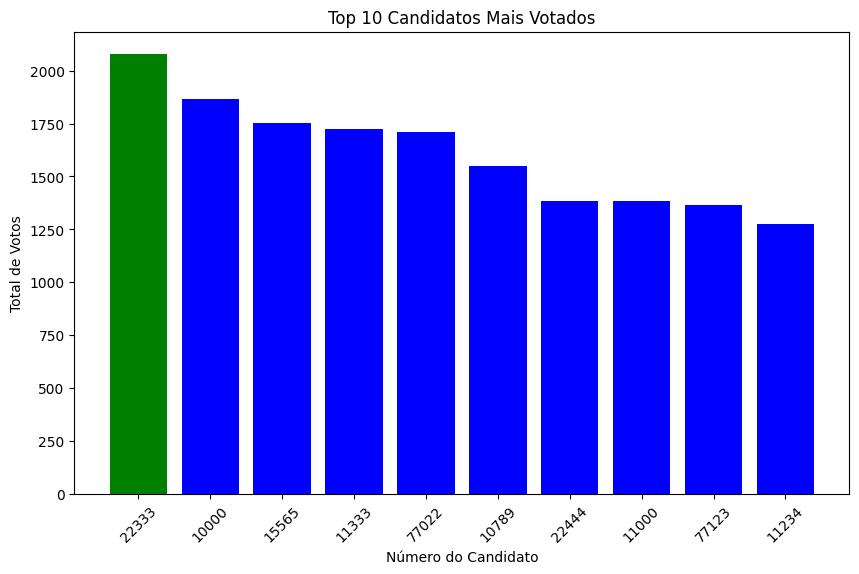

In [7]:
# Carregar a planilha
eleicao_2024 = pd.read_excel("eleicao_vereador_2024_spa.xlsx")

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel e somar os votos
for nr in eleicao_2024['nr_votavel'].unique():
    soma_votos = eleicao_2024[eleicao_2024['nr_votavel'] == nr]['qt_votos'].sum()
    resultados[nr] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_df = pd.DataFrame(list(resultados.items()), columns=['nr_votavel', 'total_votos'])

# Ordena o DataFrame pela coluna 'total_votos' em ordem decrescente e pega os 10 primeiros, excluindo nulos/brancos
top_10 = resultado_df.sort_values('total_votos', ascending=False).head(12)
top_10 = top_10[~top_10['nr_votavel'].isin([95, 96])]  # Remover votos nulos/brancos

# Definindo cores para as barras
cores = ['green' if nr == 22333 else 'blue' for nr in top_10['nr_votavel']]

# Visualização dos 10 mais votados em gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10['nr_votavel'].astype(str), top_10['total_votos'], color=cores)
plt.xlabel('Número do Candidato')
plt.ylabel('Total de Votos')
plt.title('Top 10 Candidatos Mais Votados')
plt.xticks(rotation=45)
plt.show()